<a href="https://colab.research.google.com/github/sanyasahni94/files/blob/main/ulmfit_with_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip show fastai

Name: fastai
Version: 1.0.61
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: matplotlib, scipy, dataclasses, bottleneck, packaging, pyyaml, spacy, numpy, torch, nvidia-ml-py3, pandas, numexpr, torchvision, Pillow, requests, beautifulsoup4, fastprogress
Required-by: 


In [ ]:
from fastai.text import *
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
text_path = 'gdrive/My Drive/title_StackOverflow.txt'
label_path = 'gdrive/My Drive/label_StackOverflow.txt'

In [ ]:
df_text = pd.read_csv(text_path, sep='\t', names=['text'], header=None)
df_label = pd.read_csv(label_path, sep='\t', names=['label'], header=None)
df = pd.concat([df_label, df_text], axis=1, sort=False)
print('Length of dataset: '+str(len(df.index)))
df.head()


Length of dataset: 20000


,label,text
0,18,How do I fill a DataSet or a DataTable from a ...
1,18,How do you page a collection with LINQ?
2,3,Best Subversion clients for Windows Vista (64bit)
3,3,"Best Practice: Collaborative Environment, Bin ..."
4,7,Visual Studio Setup Project - Per User Registr...


In [ ]:
#encoded label to actual label mapping

mapping = {
  1: 'wordpress',
  2: 'oracle',
  3: 'svn',
  4: 'apache',
  5: 'excel',
  6: 'matlab',
  7: 'visual-studio',
  8: 'cocoa',
  9: 'osx',
  10: 'bash',
  11: 'spring',
  12: 'hibernate',
  13: 'scala',
  14: 'sharepoint',
  15: 'ajax',
  16: 'qt',
  17: 'drupal',
  18: 'linq',
  19: 'haskell',
  20: 'magento'
}

In [ ]:
df.head()

,label,text
0,18,How do I fill a DataSet or a DataTable from a ...
1,18,How do you page a collection with LINQ?
2,3,Best Subversion clients for Windows Vista (64bit)
3,3,"Best Practice: Collaborative Environment, Bin ..."
4,7,Visual Studio Setup Project - Per User Registr...


In [ ]:
#mapping

df['label']=df['label'].apply(lambda x:mapping[x])

In [ ]:
df.tail(10)

,label,text
19990,magento,Magento filter product collection by tier pric...
19991,magento,Is there a way to refresh Magento *Catalog* (n...
19992,magento,fetch category details query in magento
19993,magento,Magento wishlist sidebar and main view only re...
19994,magento,move magento attribute to tab
19995,magento,Magento Custom Options VS Attributes
19996,magento,How to solve 404 not found problem in Magento
19997,magento,Want to add custom option from the frontend of...
19998,magento,installing magento plugins without using magen...
19999,magento,Magento : Call to a member function count() on...


In [ ]:
df.shape

(20000, 2)

In [ ]:
from sklearn.model_selection import train_test_split
df_trn, df_val = train_test_split(df, stratify = df['label'], test_size = 0.3)
df_trn.shape, df_val.shape

((14000, 2), (6000, 2))

In [ ]:
#Language Model DataBunch
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "",bs=32)
# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

In [ ]:
data_lm.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  idx_min = (t != self.pad_idx).nonzero().min()


idx,text
0,with xxmaj hibernate xxbos xxmaj loop through each row of a range in xxmaj excel xxbos sharepoint xxmaj table of xxmaj contents xxmaj web xxmaj part and export / import xxbos xxmaj excel and xxup ie7 - xxmaj prevent xxup ie from opening xxmaj excel files xxbos xxmaj function xxunk the mean of a list - xxmaj better solution ? xxbos @secondarytable annotation problem xxbos xxmaj ways to deal with
1,"overloading : xxmaj interpreter xxunk tell which + to use xxbos xxmaj grep with "" xxunk match xxbos xxmaj xxunk transparent forward proxy xxbos save plot into image file in matlab : difference between xxunk and print xxbos optional arguments in haskell xxbos xxmaj how to map old paths to xxmaj drupal paths xxbos xxmaj creating an empty txt file on xxmaj mac xxup os without opening an application first"
2,( in xxunk ) ? xxbos xxmaj dependency in traits inheritance xxbos xxmaj sharepoint : xxmaj how to programmatically manage spfolder and splistitem permissions xxbos xxmaj how do i keep an xxunk updated with the selected cell in an nsbrowser xxbos sharepoint : xxmaj why does a content deployment job customize all my master pages ? xxbos xxmaj xxunk and shared references - how to xxunk ? xxbos xxmaj magento
3,xxunk : and to - many relationships xxbos xxmaj how to build a multilingual xxmaj drupal site ? xxbos xxmaj magento - xxmaj use xxmaj short description for xxmaj google base description xxbos xxmaj hide a bash function internals .. xxbos wordpress xxmaj problem with xxunk xxbos xxmaj hibernate xxmaj error : xxmaj caused by : org.hibernate . xxunk : a different object with the same identifier value was already
4,"content to the right structural block in magento xxbos xxmaj wordpress blog setup script to create about , contact , xxunk pages xxbos xxmaj is linqtosql the same as xxmaj linq ? xxbos how to play a video after uploading videos in drupal xxbos xxmaj is there a way to have all xxunk buttons be xxunk xxbos xxmaj hibernate : xxmaj when to use xxunk ( ) and when to"


In [ ]:
data_clas.show_batch()

text,target
"xxbos xxmaj why do i receive a "" xxmaj out of xxmaj windows xxmaj resources "" warning when i open numerous figure windows in xxup matlab [ 7.0 ( xxup xxunk ) and beyond ] on a xxmaj microsoft xxmaj windows xxup pc ?",matlab
"xxbos xxmaj excel xxmaj range describes a group of adjacent cells . xxmaj when several groups of non - contiguous cells are selected , how do you get them all from xxmaj worksheet . xxmaj selected ( range ) ?",excel
xxbos xxmaj haskell : xxmaj what does it mean to have a typeclass of ` xxmaj num [ a ] ` vs a typeclass of ` ( xxmaj num a ) = > [ a ] `,haskell
"xxbos xxmaj plugin for xxmaj visual xxmaj studio to xxmaj xxunk xxmaj eclipse 's "" xxmaj open xxmaj type "" or "" xxmaj open xxmaj resource "" xxmaj keyboard xxmaj access",visual-studio
"xxbos xxmaj parsing an xxmaj excel file in c # , the cells seem to get cut off at xxunk characters ... how do i stop that ?",excel


In [ ]:
#Create and Train Language Model

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 6.31E-02


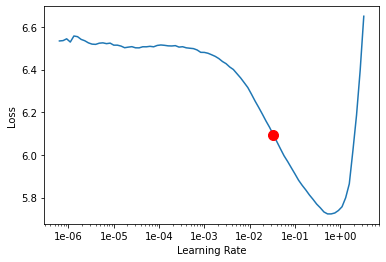

In [ ]:
#Finding the Optimal Learning Rate
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
learn.fit_one_cycle(2, min_grad_lr)


epoch,train_loss,valid_loss,accuracy,time
0,4.583216,4.041323,0.317936,00:08
1,3.913692,3.927725,0.326484,00:08


In [ ]:
# unfreezing weights and training the rest of the NN
learn.unfreeze()
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.421277,3.829388,0.335294,00:11
1,3.183088,3.844700,0.339824,00:11


In [ ]:
min_grad_lr

0.03311311214825908

In [ ]:
learn.predict("can you", n_words=15)

'can you inherit a foreach post in a parameter ? xxbos Performing an implicit undo argument'

In [ ]:
learn.save_encoder('ft_enc')

In [ ]:
#Training the Classifier


In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
#load the language model
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (14000 items)
x: TextList
xxbos xxmaj apache mod_rewrite rewriterule strange behaviour,xxbos bash : get list of variables whose name matches a certain pattern,xxbos xxmaj mapping multi - xxmaj level inheritance in xxmaj hibernate with xxmaj annotations,xxbos problem with dropdownlist xxunk and updatepanel,xxbos remove whitespace from bash variable
y: CategoryList
apache,bash,hibernate,ajax,bash
Path: .;

Valid: LabelList (6000 items)
x: TextList
xxbos xxmaj how do i work with and xxup xml tag within a string ?,xxbos xxmaj get three posts before a certain date in xxmaj wordpress,xxbos xxmaj which view will be resolved , code from spring 's docs,xxbos xxmaj flex , xxmaj xxunk and xxup xml - xxup rpc,xxbos xxmaj custom xxunk icon xxunk tooltips in xxmaj qt ?
y: CategoryList
linq,wordpress,spring,magento,qt
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(4632, 400, p

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-02
Min loss divided by 10: 3.63E-02


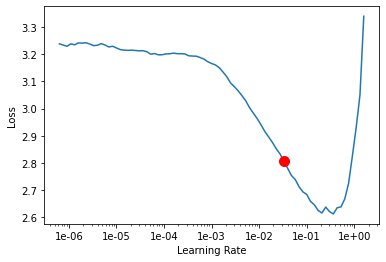

In [ ]:
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

In [ ]:
min_grad_lr

0.03311311214825908

In [ ]:
14000/32

437.5

In [ ]:
#freeze the entire layer up to the last two layers

In [ ]:
learn.freeze_to(-2) 

In [ ]:
#fit the model over two epochs at minimum learning rate
learn.fit_one_cycle(2, min_grad_lr)

epoch,train_loss,valid_loss,accuracy,time
0,1.006886,0.730934,0.793833,00:08
1,0.805214,0.630571,0.819000,00:08


In [ ]:
0.3*20000

14000/32

437.5

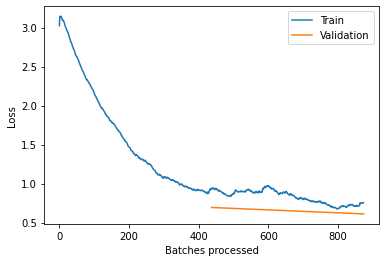

In [ ]:
learn.recorder.plot_losses()


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(2e-3/100, 2e-3), moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,0.651221,0.583327,0.834833,00:12
1,0.602191,0.549771,0.840500,00:12
2,0.458363,0.524529,0.850333,00:12
3,0.400603,0.527100,0.849500,00:13


In [ ]:
#Analyzing results

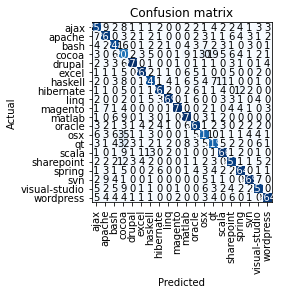

In [ ]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()

In [ ]:
interp.most_confused(10)

[('osx', 'cocoa', 35),
 ('qt', 'cocoa', 32),
 ('cocoa', 'osx', 30),
 ('cocoa', 'qt', 19),
 ('bash', 'cocoa', 16),
 ('scala', 'haskell', 13),
 ('hibernate', 'spring', 12),
 ('sharepoint', 'cocoa', 12),
 ('haskell', 'scala', 11),
 ('osx', 'qt', 10)]

In [ ]:
learn.predict("homebrew not working")

(Category tensor(3),
 tensor(3),
 tensor([0.0745, 0.0344, 0.0067, 0.1289, 0.0576, 0.0095, 0.0235, 0.0294, 0.0108,
         0.0512, 0.0148, 0.0066, 0.0805, 0.1287, 0.0114, 0.1200, 0.0788, 0.0096,
         0.0478, 0.0752]))

In [ ]:
learn.export(file='gdrive/My Drive/export.pkl')


In [ ]:
learn2=load_learner('gdrive/My Drive/', file='export.pkl')

In [ ]:
accuracy(preds,y)

tensor(0.8495)